In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("cm_dataset_2 - cm_dataset.csv", header=None)
data = np.array(data)


In [24]:
x_max = np.max(data[0])
x_min = np.min(data[0])

y_max = np.max(data[1])
y_min = np.min(data[1])

print(x_max, x_min, y_max, y_min)


-1.2061 -2.5268 0.33831 -3.7038


In [25]:
k = 2 # number of clusters
N = 1000 # number of samples
d = 2 # number of dims

In [26]:
def plot(k_=2):

    mean_array_x = np.random.uniform(low=x_min, high=x_max, size=k)
    mean_array_y = np.random.uniform(low=y_min, high=y_max, size=k)
    means = np.column_stack((mean_array_x, mean_array_y))

    # initialize
    Z = [np.argmin([np.linalg.norm(data[i] - means[j]) for j in range(k)]) for i  in range(N)]
    error = np.sum([np.linalg.norm(data[i] - means[Z[i]]) for i in range(N)])
    Z = np.array(Z)
    err = [error]

    while True:
        new_mean = np.array([np.mean(data[Z == [i]*N], axis=0) for i in range(k)])
        
        new_Z = np.array([np.argmin(np.array([np.linalg.norm(data[i] - new_mean[j]) for j in range(k)])) for i  in range(N)])
        new_error = np.sum([np.linalg.norm(data[i] - new_mean[Z[i]]) for i in range(N)])
        err.append(new_error)
        
        if new_error >= error:
            break

        error = new_error
        Z = new_Z


    for i in range(k_):
        X0 = data[new_Z == [i]*N]

        plt.scatter(X0[:, 0], X0[ :, 1], label=f'Z = {i}')

    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot with Z Labels')
    plt.legend()

    # Show the plot
    plt.show()

    plt.plot(err)

    plt.show()




NUMBER 1

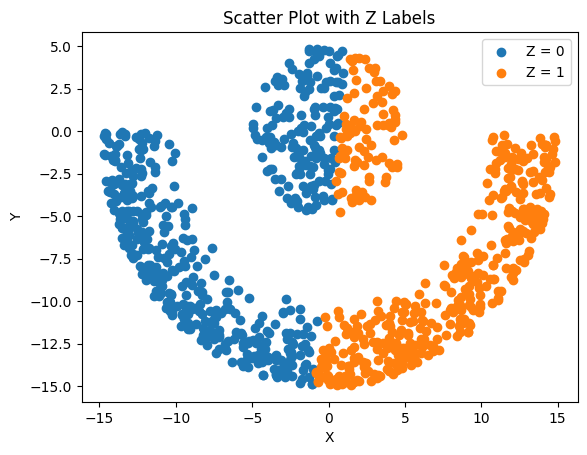

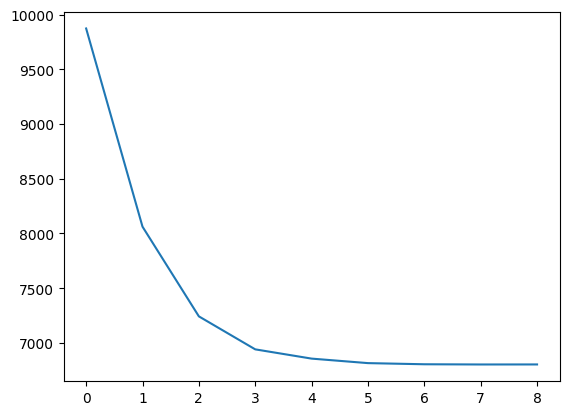

In [27]:
plot()

NUMBER 2

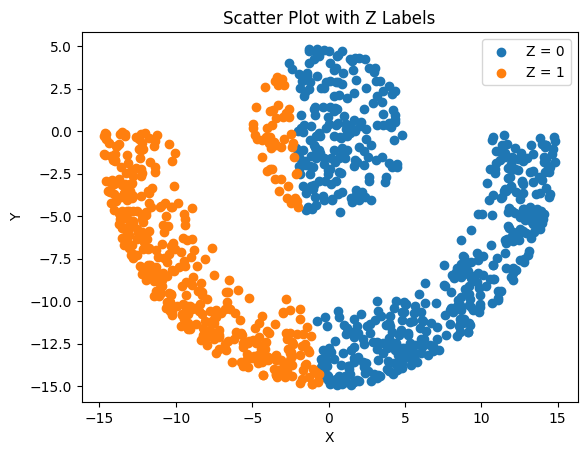

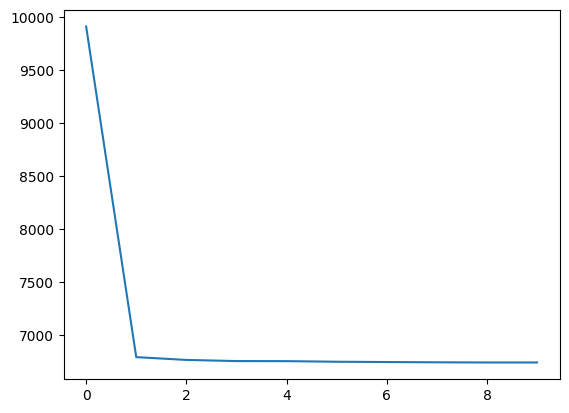

In [28]:
plot()

NUMBER 3

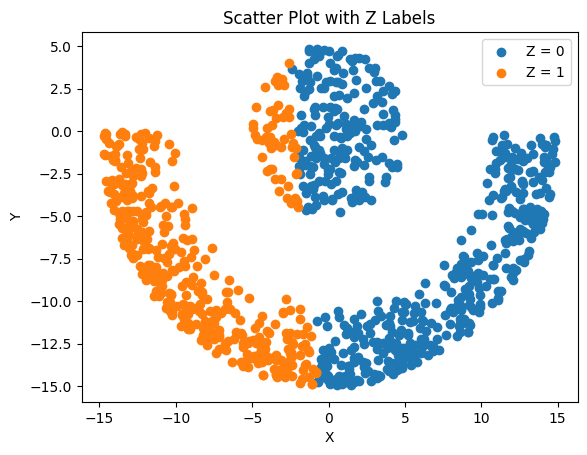

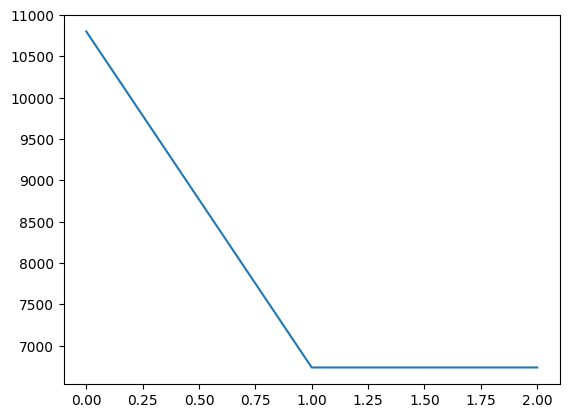

In [29]:
plot(2)

NUMBER 4

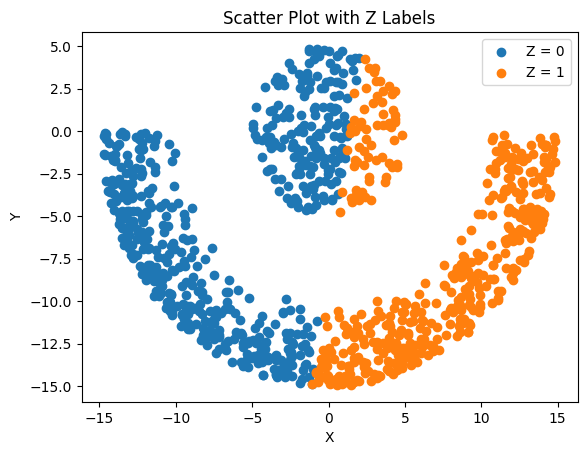

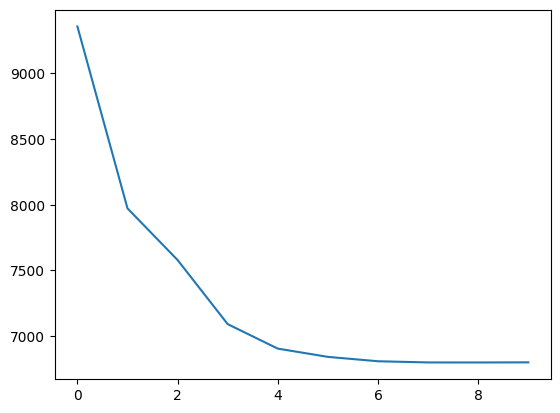

In [30]:
plot()

NUMBER 5

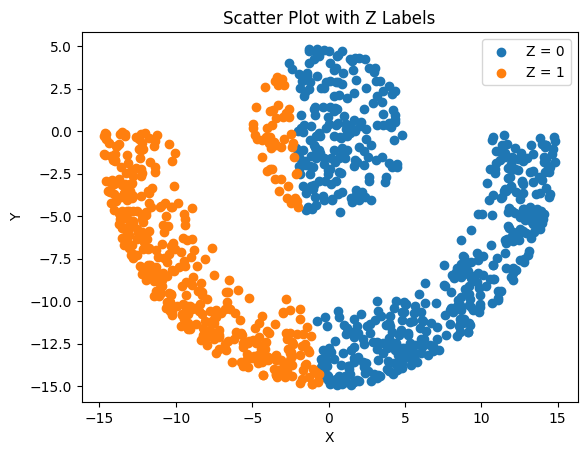

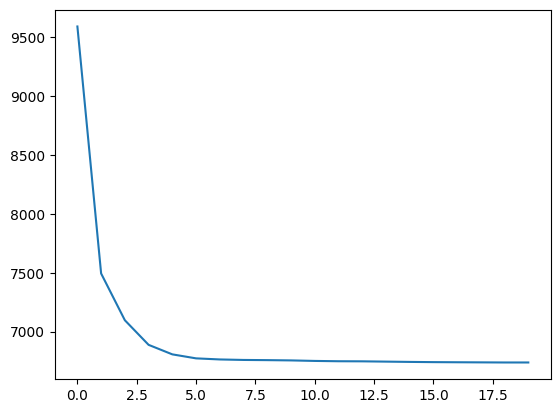

In [31]:
plot()

In [32]:
def k_means(k_):
    mean_array_x = np.random.uniform(low=x_min, high=x_max, size=k_)
    mean_array_y = np.random.uniform(low=y_min, high=y_max, size=k_)
    means = np.column_stack((mean_array_x, mean_array_y))

    # initialize
    Z = [np.argmin([np.linalg.norm(data[i] - means[j]) for j in range(k_)]) for i  in range(N)]
    error = np.sum([np.linalg.norm(data[i] - means[Z[i]]) for i in range(N)])
    Z = np.array(Z)
    err = [error]
    while True:
        new_mean = np.array([np.mean(data[Z == [i]*N], axis=0) for i in range(k_)])
        
        new_Z = np.array([np.argmin(np.array([np.linalg.norm(data[i] - new_mean[j]) for j in range(k_)])) for i  in range(N)])
        new_error = np.sum([np.linalg.norm(data[i] - new_mean[Z[i]]) for i in range(N)])
        err.append(new_error)
        
        if new_error >= error:
            break

        error = new_error
        Z = new_Z
        
    for i in range(k_):
        X0 = data[new_Z == [i]*N]

        plt.scatter(X0[:, 0], X0[ :, 1], label=f'Z = {i}')

    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot with Z Labels')
    plt.legend()

    # Show the plot
    plt.show()

    plt.plot(err)

    plt.show()


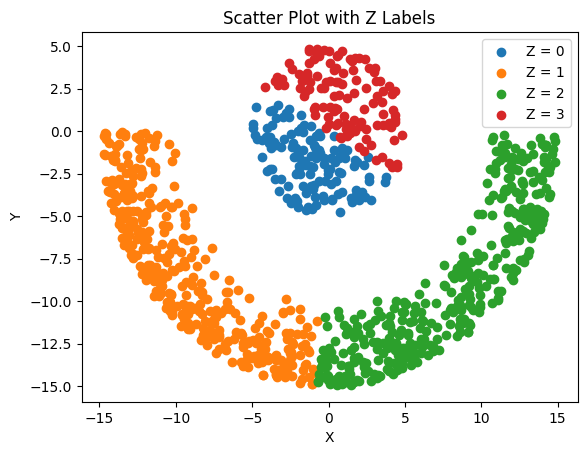

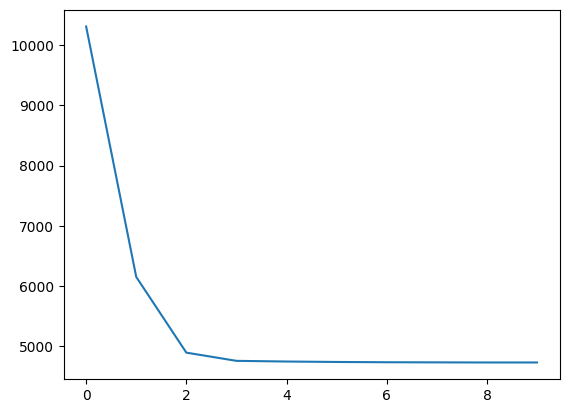

In [33]:
k_means(4)

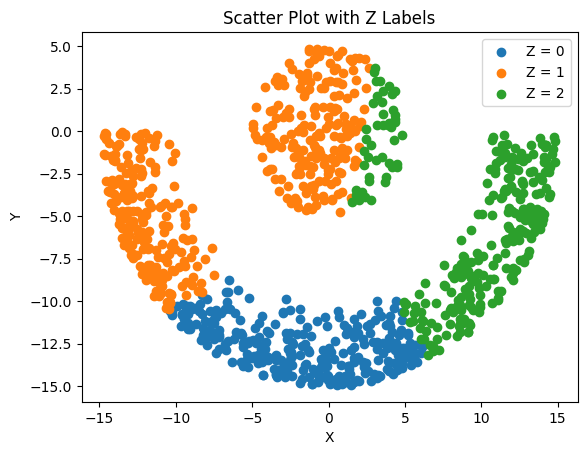

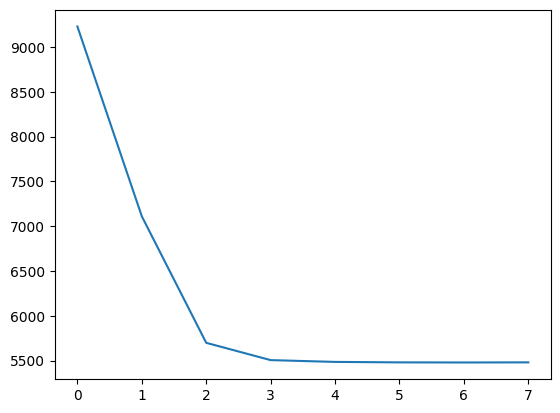

In [34]:
k_means(3)

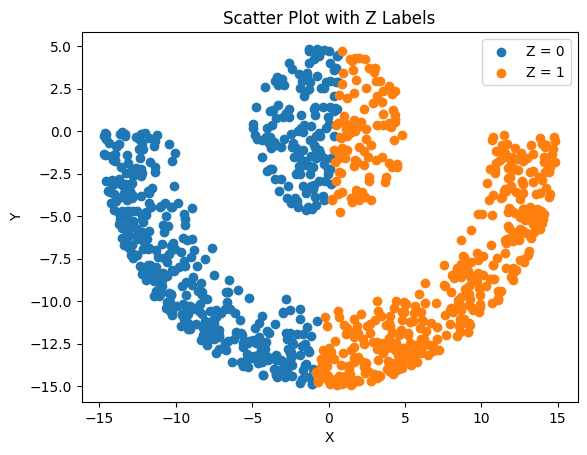

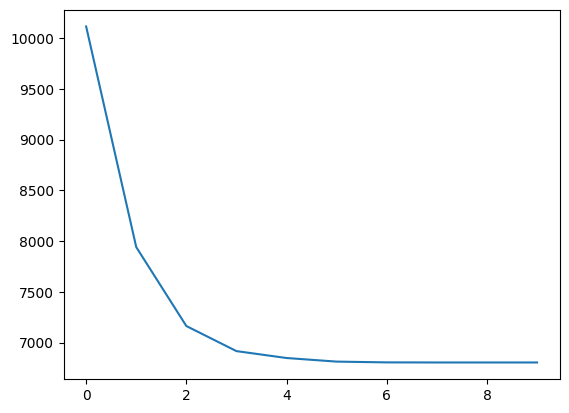

In [35]:
k_means(2)

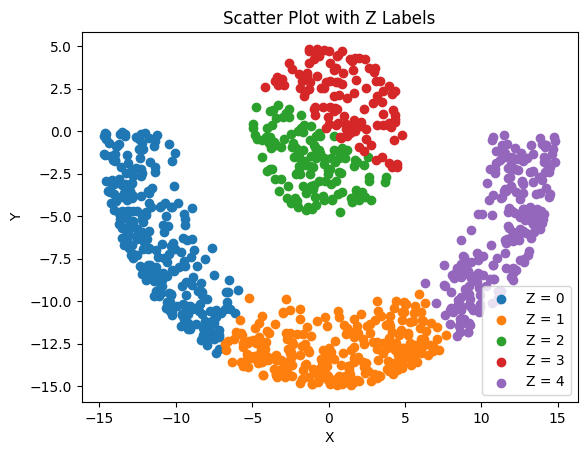

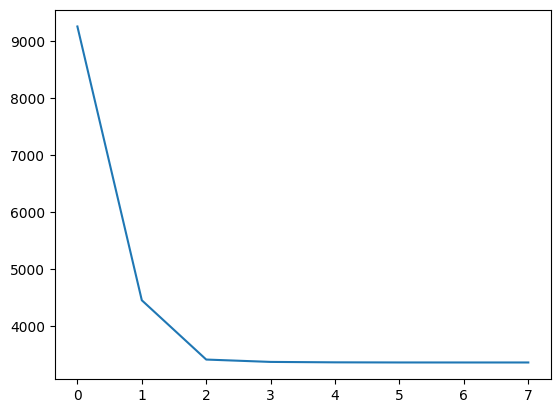

In [36]:
k_means(5)

Spectral Clustering

In [37]:
data.shape

(1000, 2)

In [57]:
def k_means_kernel(k_):
   
    K = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            K[i][j] = (1 + data[i].T@data[j])**k_

    eigen_values, eigenvectors = np.linalg.eig(K)
    H = eigenvectors[: , :2]
    row_norms = np.linalg.norm(H, axis=1, keepdims=True)
    H_norm = H/ row_norms

    x_max = np.max(H_norm[0])
    x_min = np.min(H_norm[0])

    y_max = np.max(H_norm[1])
    y_min = np.min(H_norm[1])

    print(x_max, x_min, y_max, y_min)


    mean_array_x = np.random.uniform(low=x_min, high=x_max, size=2)
    mean_array_y = np.random.uniform(low=y_min, high=y_max, size=2)
    means = np.column_stack((mean_array_x, mean_array_y))


    # initialize
    Z = [np.argmin([np.linalg.norm(H_norm[i] - means[j]) for j in range(k_)]) for i  in range(N)]
    error = np.sum([np.linalg.norm(H_norm[i] - means[Z[i]]) for i in range(N)])
    Z = np.array(Z)
    err = [error]
    while True:
        new_mean = np.array([np.mean(H_norm[Z == [i]*N], axis=0) for i in range(k_)])
        
        new_Z = np.array([np.argmin(np.array([np.linalg.norm(H_norm[i] - new_mean[j]) for j in range(k_)])) for i  in range(N)])
        new_error = np.sum([np.linalg.norm(H_norm[i] - new_mean[Z[i]]) for i in range(N)])
        err.append(new_error)
        
        if new_error >= error:
            break

        error = new_error
        Z = new_Z
        
    for i in range(k_):
        X0 = data[new_Z == [i]*N]

        plt.scatter(X0[:, 0], X0[ :, 1], label=f'Z = {i}')

    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot with Z Labels')
    plt.legend()

    # Show the plot
    plt.show()

    plt.plot(err)

    plt.show()


(0.42080251532222135+0j) (-0.9071522711752926+0j) (-0.6184317461193701+0j) (-0.7858385173760235+0j)


/tmp/ipykernel_89765/959309239.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  mean_array_x = np.random.uniform(low=x_min, high=x_max, size=2)
/tmp/ipykernel_89765/959309239.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  mean_array_y = np.random.uniform(low=y_min, high=y_max, size=2)


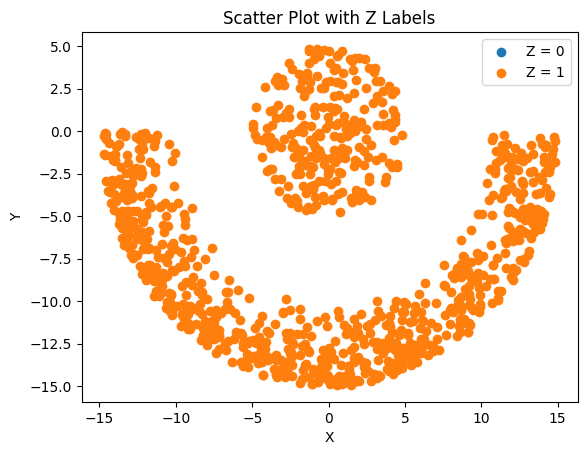

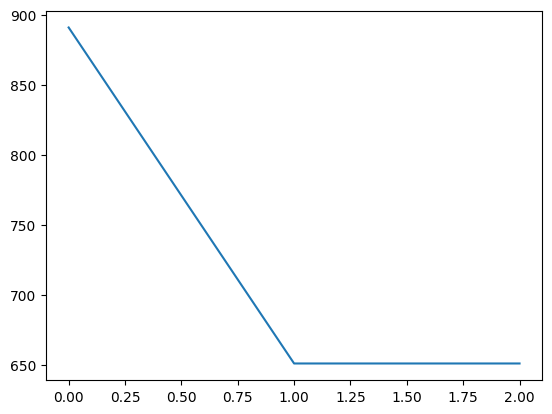

In [58]:
k_means_kernel(2)

Part (4)

In [70]:
K = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        K[i][j] = np.exp(-(data[i]- data[j]).T@(data[i]- data[j])/20)



In [71]:
eigen_values, eigenvectors = np.linalg.eig(K)
H = eigenvectors[: , :2]
row_norms = np.linalg.norm(H, axis=1, keepdims=True)
H_norm = H/ row_norms

In [75]:
Z = np.argmax(H_norm, axis=1)

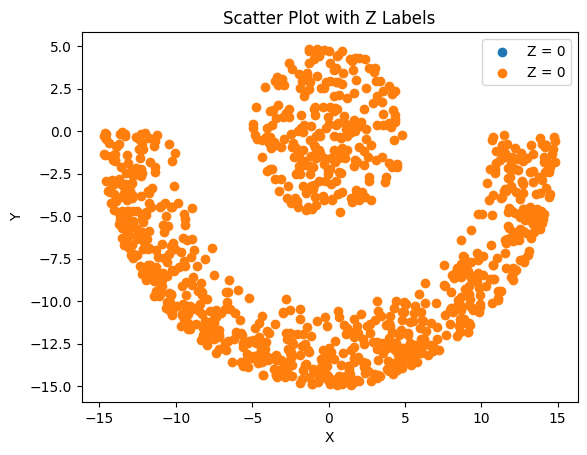

In [76]:
for i in range(2):
    X0 = data[Z == [i]*N]

    plt.scatter(X0[:, 0], X0[ :, 1], label='Z = 0')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Z Labels')
plt.legend()

# Show the plot
plt.show()

